# Genetic Control

<hr>


This lecture covers:

**Concepts**

- Activation vs. repression
- Response times of control

<hr>

In [1]:
# !pip install numpy scipy matplotlib

import numpy as np
import scipy.integrate
import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline

figsize=(6, 4.5)

<hr>

## Activation vs. Repression

Under what conditions would you prefer to use activation or repression to regulate a gene? We know that both schemes are used, and it appears that they can generate equivalent responses, since a signal that activates an activator should behave roughly similar to a signal that inhibits a repressor, as shown here: 

<div style="width: 450px; margin: auto">

<figure style="width: 100%; margin: auto; padding: 20px;">
  <img src="figs/equivalent_systems.png" alt="equivalent systems">
</figure>

</div>

### Observation

Michael Savageau posed this question in the context of bacterial metabolic gene regulation in "Design of molecular control mechanisms and the demand for gene expression" ([_PNAS_, 1977](https://www.ncbi.nlm.nih.gov/pubmed/271992)). He focused on "demand" as a critical factor that influences the choice of activation or repression. *Demand* can be defined as the fraction of time that the gene is needed at the high end of its regulatory range in the cells natural environments. Savageau made the empirical observation that high demand genes are more frequently regulated by activators, while low demand genes are more often regulated by repressors. At first this seems to be counterintuitive from a cost perspective: this strategy has a higher cost for the regulating molecule to be produced.

<div style="width: 600px; margin: auto">

<figure style="width: 100%; margin: auto; padding: 20px;">
  <img src="figs/low_demand-high_demand3.png" alt="low demand, high demand">
</figure>

</div>

### Cost vs Robustness

#### Hypothesis 1: What is not used can be lost.
Savageau suggested that this relationship  could be explained by a **"use it or lose it"** rule of evolutionary selection. A high demand gene controlled by an activator needs the activator to be on most of the time. Evolution would therefore tend to strongly select against mutations that eliminate the activator, in most conditions. By contrast, if the same high demand system were regulated by a repressor then, in most conditions, there would be no selection against mutations that removed the repressor, more readily permitting evolutionary loss of the system. This reasoning assumes no direct fitness advantage for either regulation mode, just a difference in their likelihood of evolutionary loss or, put another way, the average strength of selection pressure to maintain them.

In a [2009 _PNAS_ paper](https://dx.doi.org/10.1073%2Fpnas.0808500106), Gerland and Hwa formulated and analyzed a model to explore these ideas mathematically. They showed that the "use it or lose it" principle indeed dominates when timescales of switching between low and high demand environments are long and populations are small. However, the same model could select for the opposite demand rule in other regimes. 

#### Hypothesis 2: What is not used can be blocked.
[Shinar, et al.](https://doi.org/10.1073/pnas.0506610103) introduced a completely different explanation for the demand rules, based on the concept of "error load". The authors assumed that "naked" DNA binding sites, which are not bound to proteins, are susceptible to non-specific binding of transcription factors, which is assumed to impose a low, but non-zero fitness cost by inappropriately perturbing gene expression. Keeping these sites occupied most of the time minimizes the chances of such errors. This explanation make the same predictions but for different reasons. Here, a high demand gene should preferentially use an activator since this arrangement minimizes unoccupied binding sites. Conversely, a low demand gene would preferentially use repression to maintain the binding site in an occupied state under most conditions. This argument can be generalized to other examples of seemingly equivalent regulatory systems and is described in [Uri Alon's book](https://www.amazon.com/gp/product/1439837171/ref=dbs_a_def_rwt_bibl_vppi_i0). 

<div style="width: 300px; margin: auto">

<figure style="width: 100%; margin: auto; padding: 20px;">
  <img src="figs/ErrorLoad.png" alt="Error load">
</figure>

</div>

*In this figure, a repressor R binds strongly and specifically to its target site. In the absence of the repressor, that site could also be bound non-specifically, and inappropriately by a range of other factors A-F.*

## Dynamics: protein stability determines the response time to a change in gene expression

We now return to simple gene regulation circuits. So far, we have focused on steady states. However, many of the most important and fascinating biological systems change dynamically, even in constant environmental conditions. 

The most basic dynamic question one can ask about a gene is how rapidly it can switch from one level of protein to a new level after a sudden increase or decrease in gene expression.

Starting with our basic equation for gene expression, and neglecting the mRNA level for the moment, we write:

\begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} = \beta - \gamma x
\end{align}

Consider a simple situation in which the gene has been off for a long time, so that $x(t=0)=0$ and then is suddenly turned on at $t=0$. The solution to this simple differential equation is:

\begin{align}
x(t) = \frac{\beta }{\gamma} (1-e^{-\gamma t}) 
\end{align}

Thus, the parameter that determines the response time is $\gamma$, the degradation+dilution rate of the protein. We define the response time to the time it takes for the concentration to rise to a factor of $1/2$ of its steady state value, i.e., $\log 2 / \gamma$ in our case. We show the response time as a dot on the plot below.

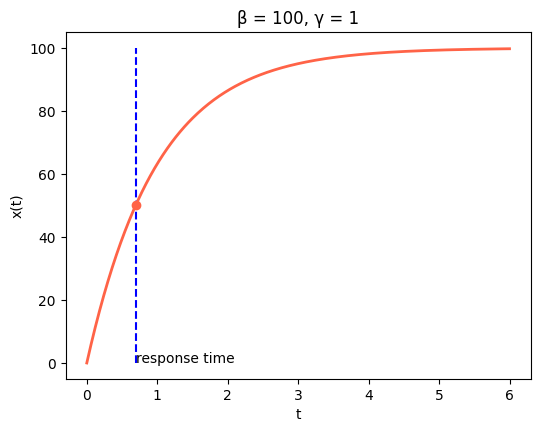

In [2]:
# Parameters
beta = 100
gamma = 1

# Dynamics
t = np.linspace(0, 6, 400)
x = beta / gamma * (1 - np.exp(-gamma * t))

# Plot
plt.figure(figsize=figsize)
plt.title(f"β = {beta}, γ = {gamma}")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.plot(t, x, linewidth=2, color="tomato")

# Mark the response time (when we get to level 1-1/e)
t0 = np.log(2) / gamma
x0 = beta / gamma * 1/2

plt.vlines(t0, 0, beta/gamma, linestyle="--", color="blue", label="response time")
plt.plot(t0, x0, marker="o", color="tomato")
plt.annotate("response time", (t0,0))

plt.show()

## How can we speed up responses?

So far, it seems as if the cell's ability to modulate the concentration of a stable protein is quite limited, apparently requiring multiple cell cycles for both increases and decreases. This seems rather pathetic for such a successful, billion year old creature. You might think you could up-regulate the protein level faster by cranking up the promoter strength (increasing $\beta$). Indeed, this would allow the cell to hit a specific threshold earlier. However, it would also increase the final steady state level ($\beta/\gamma$), and therefore leave the timescale over which the system reaches its new steady-state unaffected.

One simple and direct way to speed up the response time of the protein is to destabilize it, increasing $\gamma$. This strategy pays the cost of a "futile cycle" of protein synthesis and degradation to provide a benefit in terms of the speed with which the regulatory system can reach a new steady state. It is useful to normalize these plots by their steady states in order to focus on response times independently of steady states, as shown in the second plot below. This is a reasonable comparison because there are many mutations that alter the expression level of a gene; this property can be optimized by evolution independently of the regulatory feedback architecture.

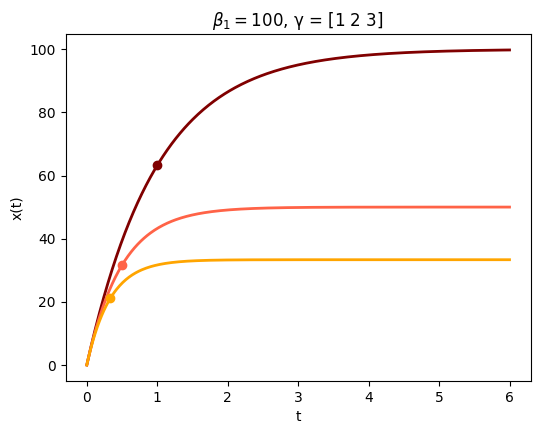

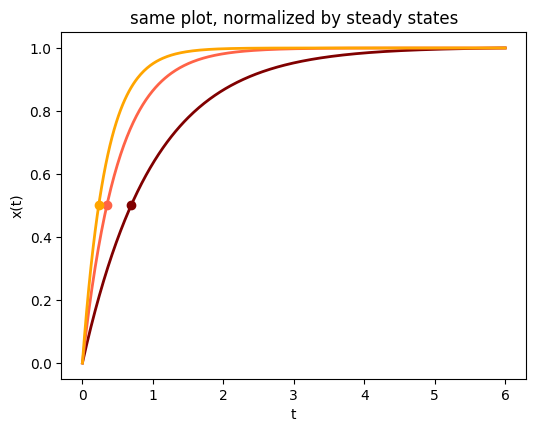

In [3]:
# Parameters
beta_1 = 100
gamma = np.array([1, 2, 3])
colors = ["maroon", "tomato", "orange"]

# Compute dynamics
t = np.linspace(0, 6, 400)
x = [beta_1 / g * (1 - np.exp(-g * t)) for g in gamma]

# Plot 1
plt.figure(figsize=figsize)
plt.title(f"$β_1 = {beta_1}$, γ = {gamma}")
plt.xlabel("t")
plt.ylabel("x(t)")

# Populate graph 1
for x_vals, g, color in zip(x, gamma, colors):
    plt.plot(t, x_vals, color=color, linewidth=2)
    plt.plot(1 / g, beta_1 / g * (1 - np.exp(-1)), marker="o", color=color)

plt.show()


# Plot 2
plt.figure(figsize=figsize)
plt.title("same plot, normalized by steady states")
plt.xlabel("t")
plt.ylabel("x(t)")

# Populate graph 2
for x_vals, g, color in zip(x, gamma, colors):
    plt.plot(t, x_vals / x_vals.max(), color=color, linewidth=2)
    plt.plot(np.log(2) / g, 1/2, marker="o", color=color)

plt.show()

**Design principle:** _Increased turnover speeds up the response time of a gene expression system, at the cost of additional protein synthesis and degradation._

## Negative autoregulation is prevalent in natural circuits

So destabilizing a protein can speed its resposne time. However, most bacterial proteins, transcription factors in particular, are stable. Do they use other mechanisms to accelerate response times? 

Empirically, we find that a large fraction of repressors repress their own expression.

<div style="width: 300px; margin: auto">

<figure style="width: 100%; margin: auto; padding: 20px;">
  <img src="figs/negative_auto_regulation_diagram.png" alt="negative autorepression">
</figure>

</div>

In fact, we can consider autoregulation to be a **network motif**, defined as a regulatory pattern that is statistically over-represented in natural networks (circuits) compared to random networks. To see this, it is useful to imagine the transcriptional regulatory network of an organism as a graph consisting of **nodes** and **directed edges** (arrows). In bacteria, each node represents an operon, while each arrow represents regulation of the target operon (tip of the arrow) by a transcription factor in the originating operon (base of the arrow), as shown schematically here.

<div style="width: 300px; margin: auto">

<figure style="width: 100%; margin: auto; padding: 20px;">
  <img src="figs/simple_graph.png" alt="simple graph">
</figure>

</div>

The transcriptional regulatory network of _E. coli_ has been mapped (see [RegulonDB](http://regulondb.ccg.unam.mx)). It contains ≈424 operons (nodes), ≈519 transcriptional regulatory interactions (arrows), involving ≈116 transcription factors. If the target of each arrow was chosen randomly, the probability of any given arrow being autoregulatory is low (≈1/424). One might expect only about one such event in the entire network. However, ≈40 such autoregulatory arrows are observed. Autoregulation thus appears to be over-represented. 

(If we further consider the "sign" of the arrow, with "+" representing activation and "-" representing repression, it turns out that there are 32 negative autoregulatory operons and 8 positive autoregulatory ones. We will discuss both types.)

This is a simple example of the **motif principle,** which states that statistically over-represented patterns in networks have been selected for key cellular functions. In fact, the motif concept is more general. For example, sequence motifs are statistically over-represented sequences within the genome that are enriched for functionally important features, such as protein binding sites. This is a core concept in bioinformatics.

## Negative autoregulation accelerates response times

Now that we know negative autoregulation is prevalent, we ask what function or functions it provides for the cell. to start, we will write down a simple differential equation representing production and degradation of the repressor, $x$.

\begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t}=\frac{\beta}{1+x/K_d} - \gamma x
\end{align}

We will consider the limit in which the autoregulation is "strong", i.e. where $\beta/\gamma \gg K_d$, so the gene can, at maximal expression level, produce enough protein to fully repress itself.

What happens when the operon is suddenly turned "on" from an initial "off" state ($x(0) = 0$)? Initially, $x$ builds up linearly, at rate $\beta$, until its concentration is high enough to shut its own production off, $x \sim K_d$, going something like this:

<div style="width: 260px; margin: auto">

<figure style="width: 100%; margin: auto; padding: 20px;">
  <img src="figs/simple_NAR_approx.png" alt="simple_NAR_approx">
</figure>

</div>

In this sketch, we can see that the half-time, $t_{1/2}$ for turning on should occur when $\beta t \approx K_d/2$, i.e. at $t \approx K_d/(2\beta)$. 

### Deriving the exact solution

To get a more precise answer, we need to solve the differential equation more carefully. The challenge is that the approximation we used in the sketch (linear growth) only works when $x$ is small. Let's break the dynamics into two phases:

**Phase 1: Early dynamics ($x \leq \epsilon K_d$)**

When $x$ is much smaller than $K_d$, the repression term $1 + x/K_d \approx 1$, so:

$$\frac{dx}{dt} \approx \beta - \gamma x$$

This gives exponential approach to $\beta/\gamma$:
$$x(t) = \frac{\beta}{\gamma}(1 - e^{-\gamma t})$$

How long does Phase 1 last? Setting $x = \epsilon K_d$ (where $\epsilon \sim 2$) and using the fact that $\beta/\gamma \gg K_d$, we find:

$$t_1 \approx \frac{\epsilon K_d}{\beta} = \frac{\epsilon K_d \gamma}{\beta} \cdot \frac{1}{\gamma}$$

Since $K_d/(\beta/\gamma) \ll 1$, this means $t_1 \ll 1/\gamma$. Phase 1 is very brief!

**Phase 2: Late dynamics ($x \gg K_d$)**

Once $x$ becomes much larger than $K_d$, the production term simplifies: $\beta/(1 + x/K_d) \approx \beta K_d/x$. The equation becomes:

$$\frac{dx}{dt} = \frac{\beta K_d}{x} - \gamma x$$

In the strong autoregulation limit, the steady state is $x_{st} \approx \sqrt{K_d \beta/\gamma}$, which means $\beta K_d = \gamma x_{st}^2$. Substituting:

$$\frac{dx}{dt} = \frac{\gamma x_{st}^2}{x} - \gamma x = \gamma \frac{x_{st}^2 - x^2}{x}$$

Separating variables and integrating from $(x_1, t_1)$ where $x_1 = \epsilon K_d$:

$$-\frac{1}{2}\ln\left(\frac{x_{st}^2 - x^2}{x_{st}^2 - x_1^2}\right) = \gamma(t - t_1)$$

Since $x_1 = \epsilon K_d \ll x_{st}$ in strong autoregulation, we have $x_{st}^2 - x_1^2 \approx x_{st}^2$:

$$1 - \frac{x^2}{x_{st}^2} = e^{-2\gamma(t - t_1)}$$

$$x(t) = x_{st}\sqrt{1 - e^{-2\gamma(t - t_1)}}$$

**What about the transition region?**

There's a brief transition region around $x \sim K_d$ where neither the Phase 1 approximation ($x \ll K_d$) nor the Phase 2 approximation ($x \gg K_d$) is strictly valid. However, in the strong autoregulation limit, this region is traversed extremely quickly. The time to go from $\epsilon K_d$ to, say, $10 K_d$ is $\Delta t \sim 10K_d/\beta \ll 1/\gamma$ (since $K_d/(\beta/\gamma) \ll 1$). So while neither approximation is exact in this region, the error accumulated is negligible compared to the overall rise-time.

**Putting it together**

The total time is $t_{total} = t_1 + (t - t_1)$, where $t_1$ is the time to complete Phase 1 and $(t - t_1)$ is the time in Phase 2. However, we found that $t_1 \sim K_d/(\beta/\gamma) \ll 1/\gamma$, while the rise-time from Phase 2 is $O(1/\gamma)$. The relative error is:

$$\frac{t_1}{t_r} \sim \frac{K_d}{\beta/\gamma} \to 0$$

as $\beta/\gamma \to \infty$ (strong autoregulation). Since the time shift $t_1$ is negligible, we can replace $(t - t_1) \to t$ in the Phase 2 solution:

$$x(t) \approx x_{st}\sqrt{1 - e^{-2\gamma t}}$$

This is the limiting analytical solution. The error from ignoring Phase 1 is only $\Delta t \sim t_1 \sim K_d/(\beta/\gamma) \ll 1/\gamma$, which becomes negligible as $\beta/\gamma \to \infty$.

To find the rise-time explicitly, we set $x = x_{st}/2$:

$$\frac{1}{2} = \sqrt{1 - e^{-2\gamma t_r}}$$

$$\frac{1}{4} = 1 - e^{-2\gamma t_r}$$

$$e^{-2\gamma t_r} = \frac{3}{4}$$

$$t_r = \frac{\ln(4/3)}{2\gamma} \approx \frac{0.144}{\gamma}$$

For comparison, the unregulated system has $x(t) = (\beta/\gamma)(1 - e^{-\gamma t})$, giving a rise-time of:

$$t_r^{unreg} = \frac{\ln(2)}{\gamma} \approx \frac{0.693}{\gamma}$$

The key insight is that the strong promoter gives a fast initial boost, then self-repression prevents overshoot. Negative autoregulation achieves a speedup of approximately $0.693/0.144 \approx 4.8 \approx$ **5 times faster** than the unregulated case.

A more complete treatment can be found in <a href="https://doi.org/10.1016/S0022-2836(02)00994-4">Rosenfeld et al, JMB 2002</a>. In the following section, we will explore these dynamics using numerical integration and compare them to this analytical approximation.

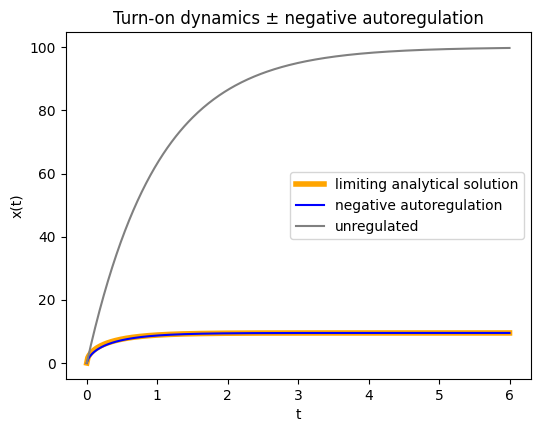

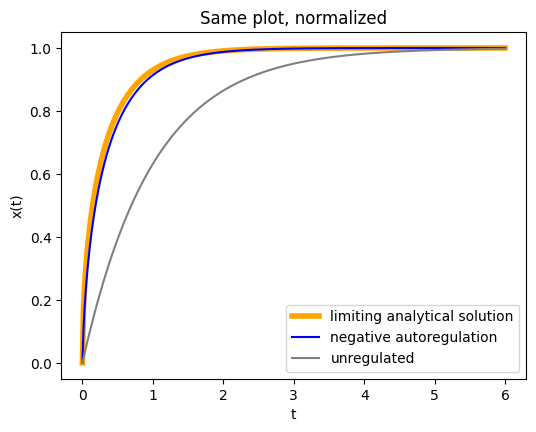

In [4]:
# Negative autoregulation right hand side
def neg_auto_reg_rhs(x, t, beta, Kd, gamma):
    return beta / (1 + x / Kd) - gamma * x

# Parameters
t = np.linspace(0, 6, 400)
Kd = 1
gamma = 1
beta = 100

# Negative autoregulated solution
y = scipy.integrate.odeint(neg_auto_reg_rhs, 0, t, args=(beta, Kd, gamma))
nar = y[:, 0]

# Unregulated solution
unreg = 1 - np.exp(-gamma * t)

# Limiting solution
limiting = np.sqrt(1 - np.exp(-2 * gamma * t))

# Plot 1
plt.figure(figsize=figsize)
plt.title("Turn-on dynamics ± negative autoregulation")
plt.xlabel("t")
plt.ylabel("x(t)")

plt.plot(t, nar.max()*limiting, color="orange", linewidth=4, label="limiting analytical solution")
plt.plot(t, nar, color="blue", label="negative autoregulation")
plt.plot(t, beta/gamma*unreg, color="gray", label="unregulated")

plt.legend()
plt.show()

# Plot 2
plt.figure(figsize=figsize)
plt.title("Same plot, normalized")
plt.xlabel("t")
plt.ylabel("x(t)")

plt.plot(t, limiting, color="orange", linewidth=4, label="limiting analytical solution")
plt.plot(t, nar/nar.max(), color="blue", label="negative autoregulation")
plt.plot(t, unreg, color="gray", label="unregulated")

plt.legend()
plt.show()

What do we see here: First, as you would expect, adding negative autoregulation reduces the steady-state expression level. However, it also has a second effect: accelerating the approach to steady state. In the right-hand plot we include the limiting analytical solution from <a href="https://doi.org/10.1016/S0022-2836(02)00994-4">Rosenfeld et al.</a> for comparison.

In fact, _negative autoregulation has accelerated the dynamics by about 5-fold compared to the unregulated system._ 

Note that this acceleration occurs when we turn the gene on, but not when we turn it off. If we suddenly stop expression by setting $\beta$ to 0, then the dynamics are governed by $\mathrm{d}x/\mathrm{d}t = -\gamma x$ irrespective of which architecture we use. 

Can this acceleration be observed experimentally? To find out, <a href="https://doi.org/10.1016/S0022-2836(02)00994-4">Rosenfeld et al.</a> engineered a simple synthetic system based on a bacterial repressor called TetR, fused to a fluorescent protein for readout, and studied its turn-on dynamics in bacterial populations. 

<br />

<div style="width: 350px; margin: auto">

<figure style="width: 100%; margin: auto; padding: 20px;">
  <img src="figs/negative_autoregulation_experiment.png" alt="negative autoregulation experiment">
</figure>

</div>


<center>This image is taken from <a href="https://doi.org/10.1016/S0022-2836(02)00994-4">Rosenfeld et al., <emph>J. Mol. Biol.</emph>, 2002</a>.</center>

<br />


Interestingly, these dynamics showed  the expected acceleration, as well as some oscillations around steady-state, which may be explained by time delays in the regulatory system.

To conclude this section: We now have identified another simple **design principle:** **_Negative autoregulation speeds the response time of a transcription factor_**.

Negative autoregulation can have additional functions beyond acceleration. Using similar synthetic approaches, negative autoregulation was shown to reduce stochastic cell-cell variability ("noise") in gene expression ([Becskei and Serrano, _Nature_, 2000](https://doi.org/10.1038/35014651)).

## Interlude: Hill functions and ultrasensitivity

Before moving forward, let us take a moment to introduce a very useful function called the Hill function. The reason we need this function is that many responses in gene regulation and protein-protein interactions have a switch-like, or **ultrasensitive** shape. Ultrasensitivity can arise from **cooperativity** in molecular interactions. For example, consider a situation in which binding of a protein at one DNA binding site increases the affinity for binding of a second protein at an adjacent site. Or, imagine a protein with an alternative molecular conformation that is stabilized by binding of multiple agonist effector molecules and, in that conformation, has a higher affinity for the same effectors. In these and many other situations, an increasing concentration of one species can have little effect for a while, and then suddenly have a large effect. 

The Hill function provides a way to analyze systems that have ultrasensitive interactions. While it can be derived from models of some processes, it is often used in a more generic way to analyze how a circuit would behave with different levels of ultrasensitivity.

An activating Hill function is defined by 

\begin{align}
f_\mathrm{act}(x) &= \frac{x^n}{K^n +x^n} = \frac{(x/K)^n}{1 + (x/K)^n}.
\end{align}

You can also make a mirror-image repressive Hill function. 

\begin{align}
f_\mathrm{rep}(x) &= \frac{K^n}{K^n +x^n} = \frac{1}{1 + (x/K)^n}.
\end{align}

In these expressions, the $K$ represents the concentration at which the function attains half its maximal value, and the **Hill coefficient**, $n$, parameterizes how ultrasensitive the response is. When $n=1$, we recover the simple binding curves we have already introduced. When $n>1$, however, we achieve ever sharper, more ultrasensitive, responses. Finally, in the limit of $n=\infty$ we have a step function. Here we plot the Hill function for a few values of $n$:

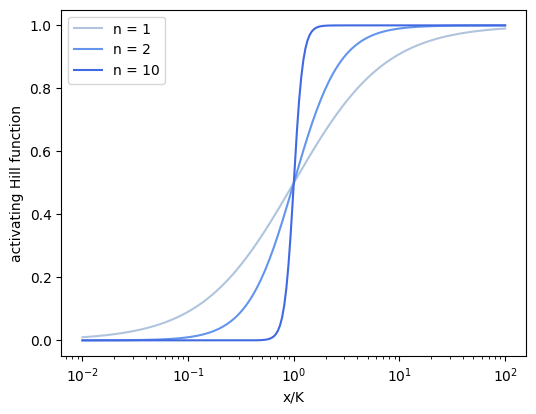

In [5]:
x = np.logspace(-2, 2, 200)
f = [x**n / (1 + x**n) for n in [1, 2, 10]]
colors = ["lightsteelblue", "cornflowerblue", "royalblue"]


plt.figure(figsize=figsize)
plt.xlabel("x/K")
plt.xscale("log")
plt.ylabel("activating Hill function")

for f_act, n, color in zip(f, [1, 2, 10], colors):
    plt.plot(x, f_act, color=color, label=f"n = {n}")

plt.legend()
plt.show()

You can try altering the code above to analyze repressive Hill functions.

The name of the Hill function is suggestive–it looks like a hill. In fact, it was named for Archibald Hill, who used it to model binding of oxygen by Hemoglobin.  

## Positive autoregulation enables bistability

Having examined negative autoregulation, we now turn to its opposite, **positive autoregulation,** a feature that is *also* prevalent in natural circuits. What functions could positive autoregulation provide?

<div style="width: 250px; margin: auto">

<figure style="width: 100%; margin: auto; padding: 20px;">
  <img src="figs/positive_autoregulation.png" alt="positive autoregulation">
</figure>

</div>

We can represent a positive autoregulatory circuit with the following simple equation:

\begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} = \frac{\beta x^n} {x^n + K^n} - \gamma x 
\end{align}

Note that we've replaced the simple activation function with a more general Hill function. To see what positive autoregulation might do, let's plot the two terms on the right hand side (production rate and removal rate) versus $x$. We will start by considering a relatively high Hill coefficient of $n=4$.


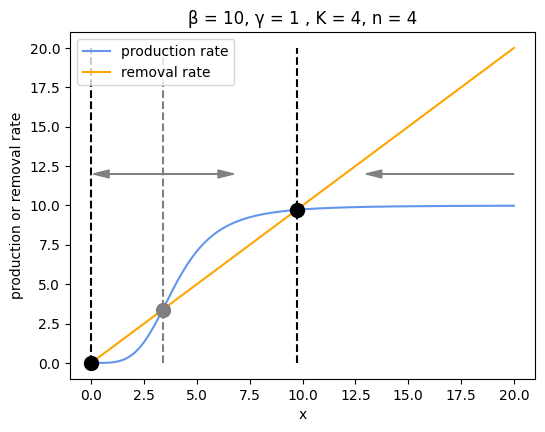

In [6]:
# Parameters
beta = 10
gamma = 1
K = 4
n = 4

# Theoretical curves
x = np.linspace(0, 20, 400)
prod = beta * x ** n / (x ** n + K ** n)
removal = gamma * x

# Fixed points
def fp_rhs(x):
    return beta / gamma * x ** n / (x ** n + K ** n)
fixed_points = [
    0,
    float(scipy.optimize.fixed_point(fp_rhs, 3)),
    float(scipy.optimize.fixed_point(fp_rhs, 5)),
]

plt.figure(figsize=figsize)
plt.title(f"β = {beta}, γ = {gamma} , K = {K}, n = {n}")
plt.xlabel("x")
plt.ylabel("production or removal rate")

plt.plot(x, prod, color="cornflowerblue", label="production rate")
plt.plot(x, removal, color="orange", label="removal rate")

# Plot fixed points
for i, fp in enumerate(fixed_points):
    color="gray" if i%2 else "black"
    plt.vlines(fp, 0, 20, linestyle="--", color=color)
    plt.plot(fp, gamma*fp, marker="o", markersize=10, color=color)

# Arrows
plt.arrow(3.25, 12, 0.1-3.25, 0, color="gray", length_includes_head=True, head_width=0.5)
plt.arrow(3.25, 12, 6.75-3.25, 0, color="gray", length_includes_head=True, head_width=0.5)
plt.arrow(20, 12, 13-20, 0, color="gray", length_includes_head=True, head_width=0.5)

plt.legend()
plt.show()

Wherever production rate = degradation rate, we have a **fixed point**. For these parameters, there are three fixed points. These points differ in their stability. The one in the middle is unstable, while the two on the ends are stable. The easiest way to see this is to notice that between the first and second fixed points removal rate > production rate, and hence x will decrease, while between the second and third fixed points, production exceeds removal, and x will increase.

Since this system has two stable fixed points, we can describe it as **bistable**. As long as noise or other perturbations are not too strong, the cell can happily remain at either a low or high value of x. 

Bistability is a special case of the more general phenomenon of **multistability**, which is one of the most important properties in biology, underlying the ability of a single genome to produce a vast array of distinct cell types in a multicellular organism. This simple analysis shows us immediately that a single gene positive feedback loop can be sufficient to generate bistability! 

However, positive feedback by itself _is not enough_. We also need an **ultrasensitive** response to $x$. (In the context of the Hill function, ultrasensitivity can be defined simply as $n>1$). If we reduce the Hill coefficient to 1, keeping other parameters the same, you can see that we now have only a single stable fixed point (and one unstable fixed point at $x=0$).

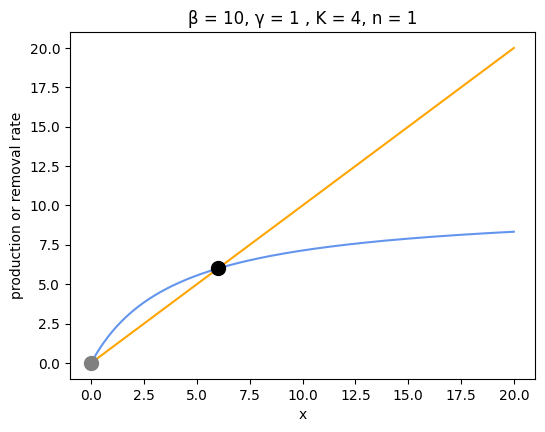

In [7]:
n = 1  # Reduced to 1

# Re compute production curve
prod = beta * x ** n / (x ** n + K ** n)

# Fixed points
def fp_rhs(x):
    return beta / gamma * x ** n / (x ** n + K ** n)
fixed_points = [0, float(scipy.optimize.fixed_point(fp_rhs, 3))]

plt.figure(figsize=figsize)
plt.title(f"β = {beta}, γ = {gamma} , K = {K}, n = {n}")
plt.xlabel("x")
plt.ylabel("production or removal rate")

plt.plot(x, prod, color="cornflowerblue", label="production rate")
plt.plot(x, removal, color="orange", label="removal rate")

# Plot fixed points
for i, fp in enumerate(fixed_points):
    color="black" if i%2 else "gray"
    plt.plot(fp, gamma*fp, marker="o", markersize=10, color=color)

plt.show()


Furthermore, ultrasensitivity is also not enough. Bistability in this system further requires tuning of different rate constants. For example, consider what happens for varying values of $\gamma$. (Here, I've set a very high value of $n=10$ just to focus on the role of $\gamma$.)

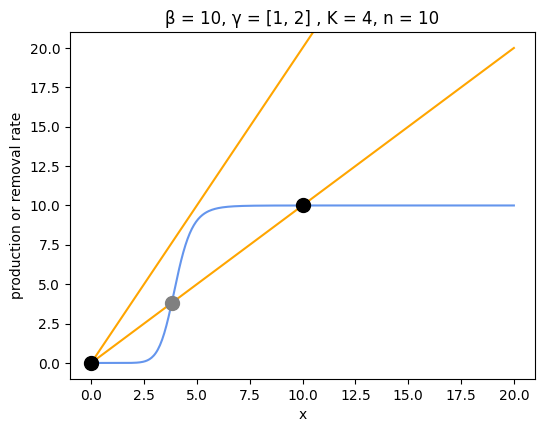

In [8]:
n = 10  # highly cooperative
gamma = [1, 2]

# Recompute production rate
prod = beta * x ** n / (x ** n + K ** n)

# Fixed points
def fp_rhs(x):
    return beta / gamma[0] * x ** n / (x ** n + K ** n)
fixed_points = [
    0,
    float(scipy.optimize.fixed_point(fp_rhs, 4)),
    float(scipy.optimize.fixed_point(fp_rhs, 10)),
]

plt.figure(figsize=figsize)
plt.title(f"β = {beta}, γ = {gamma} , K = {K}, n = {n}")
plt.xlabel("x")
plt.ylabel("production or removal rate")
plt.ylim([-1,21])

plt.plot(x, prod, color="cornflowerblue", label="production rate")
plt.plot(x, gamma[0]*x, color="orange", label="removal rate")
plt.plot(x, gamma[1]*x, color="orange", label="removal rate")

# Plot fixed points
for i, fp in enumerate(fixed_points):
    color="gray" if i%2 else "black"
    plt.plot(fp, gamma[0]*fp, marker="o", markersize=10, color=color)

plt.show()

Note that with just a two-fold higher value of $\gamma=2$ (upper orange line), we lose the last two fixed points, giving us a monostable system that just remains, sadly, at 0, totally unable to activate itself. Based on considerations like this, we can see that positive autoregulatory feedback and ultrasensitivity do _not_, in general, guarantee bistability, though they can provide it. 

We have now identified another **circuit design principle: _Positive, ultrasensitive autoregulation enables bistability._**

## The toggle switch: a two-gene positive feedback system

In natural circuits positive feedback loops are often observed among multiple regulators rather than just a single autoregulatory transcription factor. For example, the "genetic switch" in phage lambda involves reciprocal repression of the *cro* repressor by the $\lambda$ repressor, and vice versa (see [Mark Ptashne's classic book, _A genetic switch_](https://www.amazon.com/Genetic-Switch-Third-Lambda-Revisited/dp/0879697164)). This arrangement allows the phage to remain in the dormant "lysogenic" state or switch to a "lytic" state in which it replicates and eventually lyses the host cell to infect other cells. 

In 2000, [Gardner and Collins](https://doi.org/10.1038/35002131) designed, constructed, and analyzed a synthetic version of this feedback loop, termed the toggle switch, and showed that it could similarly exhibit bistability. Here is a simple diagram of the general design.

<div style="width: 350px; margin: auto">

<figure style="width: 100%; margin: auto; padding: 20px;">
  <img src="figs/toggle.png" alt="toggle">
</figure>

</div>

They further showed experimentally that they could put the system into one of two states, by externally activating either of the two proteins. Then they could remove the perturbation and the system stably remained in that state. 

To analyze this two-repressor feedback loop, we can write down a simplified model for the levels of both the $x$ and $y$ proteins, both having the same Hill coefficient, $n$.

\begin{align}
&\frac{dx}{dt} = \frac{\beta_x}{1 + (y/k_y)^n} - \gamma_x x,\\[1em]
&\frac{dy}{dt} = \frac{\beta_y}{1 + (x/k_x)^n} - \gamma_y y.
\end{align}

We nondimensionalize by taking $\beta_x \leftarrow \beta_x/\gamma_x k_x$, $\beta_y \leftarrow \beta_y/\gamma_y k_y$, $x \leftarrow x/k_x$, $y \leftarrow y/k_y$, $t \leftarrow \gamma_x t$, and $\gamma = \gamma_y/\gamma_x$. We can now see that the behavior of the system really depends only on (a) the strengths of the two promoters, (b) the _relative_ timescales of the two proteins, and (c) the sensitivity of the response (Hill coefficient):

\begin{align}
\frac{dx}{dt} &= \frac{\beta_x}{1 + y^n} - x,\\[1em]
\gamma^{-1}\,\frac{dy}{dt} &= \frac{\beta_y}{1 + x^n} - y.
\end{align}

A great way to analyze a two-dimensional system like this is by computing the **nullclines**, which are defined by setting each of the time derivatives equal to zero.

\begin{align}
x\text{ nullcline: }& x = \frac{\beta_x}{1 + y^n}, \\[1em]
y\text{ nullcline: }& y= \frac{\beta_y}{1 + x^n}.
\end{align}

Wherever these two lines cross, one has a fixed point. The stability of that fixed point can be determined by linear stability analysis. For now, we will plot the two nullclines and investigate their behavior by varying the dimensionless parameters $\beta_x$ and $\beta_y$, as well as the Hill coefficient $n$. The plot we show below is interactive, including in the HTML rendering of this lesson.

In [9]:
# !pip install bokeh

import bokeh.io
import bokeh.plotting

bokeh.io.output_notebook()

# Set up sliders
params = [
    dict(
        name="βx",
        start=0.1,
        end=20,
        step=0.1,
        value=10,
        long_name="beta_x_slider",
    ),
    dict(
        name="βy",
        start=0.1,
        end=20,
        step=0.1,
        value=10,
        long_name="beta_y_slider",
    ),
    dict(name="n", start=1, end=10, step=0.1, value=4, long_name="n_slider"),
]
sliders = [
    bokeh.models.Slider(
        start=param["start"],
        end=param["end"],
        value=param["value"],
        step=param["step"],
        title=param["name"],
    )
    for param in params
]

# Build base plot with starting parameters
beta = 10
n = 4

# Compute nullclines
x_y = np.linspace(0, 20, 400)
y_x = np.linspace(0, 20, 400)
x_x = beta / (1 + y_x ** n)
y_y = beta / (1 + x_y ** n)

source = bokeh.models.ColumnDataSource(
    data=dict(x_x=x_x, x_y=x_y, y_x=y_x, y_y=y_y)
)

# Make the plot
p = bokeh.plotting.figure(
    frame_height=275, frame_width=375, x_axis_label="x", y_axis_label="y"
)
p.line(
    x="x_x", y="y_x", source=source, line_width=2, legend_label="x nullcline"
)
p.line(
    x="x_y",
    y="y_y",
    source=source,
    line_width=2,
    color="orange",
    legend_label="y nullcline",
)

# Callback (uses JavaScript)
js_code = """
// Extract data from source and sliders
var x_x = source.data['x_x'];
var x_y = source.data['x_y'];
var y_x = source.data['y_x'];
var y_y = source.data['y_y'];
var beta_x = beta_x_slider.value;
var beta_y = beta_y_slider.value;
var n = n_slider.value

// Update nullclines
for (var i = 0; i < x_y.length; i++) {
    x_x[i] = beta_x / (1 + Math.pow(y_x[i], n));
    y_y[i] = beta_y / (1 + Math.pow(x_y[i], n));
}

// Emit changes
source.change.emit();
"""
callback = bokeh.models.CustomJS(args=dict(source=source), code=js_code)

# We use the `js_on_change()` method to call the custom JavaScript code.
for param, slider in zip(params, sliders):
    callback.args[param["long_name"]] = slider
    slider.js_on_change("value", callback)

bokeh.io.show(bokeh.layouts.column(bokeh.layouts.column(sliders), p))

Loading BokehJS ...

You can investigate the nullclines by playing with the sliders (even in the HTML rendering of this notebook). For $\beta_x = \beta_y = 10$ and $n = 4$, we clearly have three crossings of the nullclines, giving one unstable (the one in the middle) and two stable (the ones on the ends) fixed points. 

Try sliding the $n$ slider. As you move $n$ down, you can see that one can still obtain bistability at lower Hill coefficients, but one can see it becomes a more delicate balancing act where the values of $\beta_x$ and $\beta_y$ need to be large and close in magnitude. Bistablity is lost completely at $n=1$, where the system becomes monostable. 

Even at higher Hill coefficients, the strengths of the promoters must still be balanced. If we have widely varying values of $\beta_x$ and $\beta_y$, we again have monostability. You can see this by setting $\beta_x = 10$, $\beta_y = 1.5$, and $n = 5$ with the sliders.

Thus, as with the single gene autoregulatory positive feedback loop, ultrasensitivity is necessary but not sufficient for bistability. Later in the course, we will further analyze this system and its stability, learning how to further characterize dynamical systems beyond their nullclines.

**Discussion question:** What are the advantages of the two-gene toggle switch compared to the single gene positive autoregulation circuit?


## Summary

* Protein degradation and dilution rates determine (and limit) the switching speed of a simple transcriptinally regulated gene.
* **Design principle:** _Negative autoregulation accelerates turn-on of a transcription factor._
* **Design principle:** _Positive, ultrasensitive autoregulation generates bistability._
* Even simple circuits of 1 or 2 genes can generate interesting functional capabilities.
* Synthetic circuits can be used to test the functions of simple circuits in living cells.

This is our first foray into the analysis of dynamical systems. As we continue to work with dynamical systems, [Strogatz's book](https://www.amazon.com/gp/product/0813349109/) is a great introduction, and includes discussion on using nullclines in the analysis.

---
**License & Attribution**: This page is from material by [Michael Elowitz and Justin Bois](https://biocircuits.github.io/) (© 2021–2025), licensed under [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), with minor modifications.